In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/User/Downloads/testscore.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some college,standard,completed,77,81,78
1,female,group B,some high school,free/reduced,completed,37,49,46
2,male,group A,some college,free/reduced,completed,32,37,41
3,male,group B,bachelor's degree,standard,completed,88,87,80
4,female,group C,high school,standard,completed,92,92,93


In [3]:
sum=df[['math score','reading score','writing score']].sum(axis=1)



In [4]:
df['sum']=pd.Series(sum,index=df['gender'].index)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum
0,male,group C,some college,standard,completed,77,81,78,236
1,female,group B,some high school,free/reduced,completed,37,49,46,132
2,male,group A,some college,free/reduced,completed,32,37,41,110
3,male,group B,bachelor's degree,standard,completed,88,87,80,255
4,female,group C,high school,standard,completed,92,92,93,277


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
sum                            1000 non-null int64
dtypes: int64(4), object(5)
memory usage: 50.8+ KB


In [6]:
df.describe()

,math score,reading score,writing score,sum
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,67.584000,70.249000,69.128000,206.961000
std,15.375414,14.684162,15.242242,43.166942
min,16.000000,18.000000,16.000000,51.000000
25%,57.000000,61.000000,59.000000,179.000000
50%,68.000000,70.000000,70.000000,206.000000
75%,79.000000,80.250000,80.000000,237.000000
max,100.000000,100.000000,100.000000,300.000000


In [7]:
df['parental level of education'].unique()

array(['some college', 'some high school', "bachelor's degree",
       'high school', "associate's degree", "master's degree"], dtype=object)

In [8]:
# df['gender']=df['gender'].replace(['female','male'],[0,1])

In [9]:
# df['race/ethnicity']=df['race/ethnicity'].replace(['group C','group D','group B','group E','group A'],[3,4,2,5,1])

In [10]:
# df['parental level of education']=df['parental level of education'].replace(['some college', 'some high school', "bachelor's degree",'high school', "associate's degree", "master's degree"],[1,2,3,4,5,6])
# df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum
0,1,3,1,standard,completed,77,81,78,236
1,0,2,2,free/reduced,completed,37,49,46,132
2,1,1,1,free/reduced,completed,32,37,41,110
3,1,2,3,standard,completed,88,87,80,255
4,0,3,4,standard,completed,92,92,93,277


In [41]:
features=df.drop([['math score','reading score','writing score','sum']],axis=0)
y=df['sum']
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in features:
    features[col]=labelencoder.fit_transform(features[col])           

TypeError: unhashable type: 'list'

In [11]:
df['math score'].describe()

count    1000.000000
mean       67.584000
std        15.375414
min        16.000000
25%        57.000000
50%        68.000000
75%        79.000000
max       100.000000
Name: math score, dtype: float64

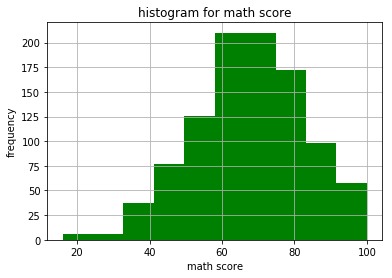

In [12]:
plt.hist(df['math score'],color='g')
plt.title('histogram for math score')
plt.xlabel('math score')
plt.ylabel('frequency')
plt.grid(True)

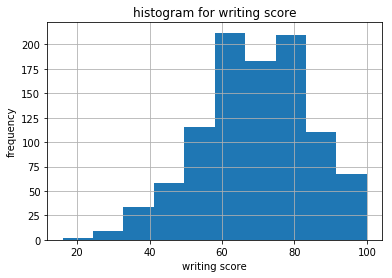

In [13]:
plt.hist(df['writing score'])
plt.title('histogram for writing score')
plt.xlabel('writing score')
plt.ylabel('frequency')
plt.grid(True)

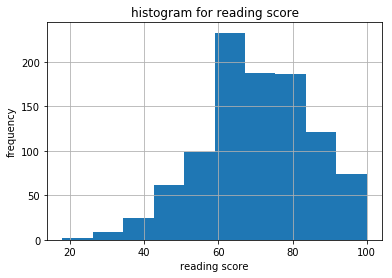

In [14]:
plt.hist(df['reading score'])
plt.title('histogram for reading score')
plt.xlabel('reading score')
plt.ylabel('frequency')
plt.grid(True)

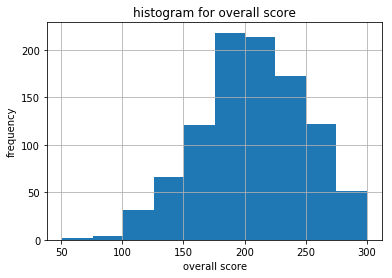

In [15]:
plt.hist(df['sum'])
plt.title('histogram for overall score')
plt.xlabel('overall score')
plt.ylabel('frequency')
plt.grid(True)

In [16]:
df[df['gender']==0].describe()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,sum
count,516.0,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,0.0,3.259690,3.267442,65.073643,73.507752,73.337209,211.918605
std,0.0,1.112333,1.624505,14.948143,13.767767,14.019080,41.471304
min,0.0,1.000000,1.000000,21.000000,34.000000,34.000000,100.000000
25%,0.0,2.000000,2.000000,55.000000,65.000000,64.000000,185.750000
50%,0.0,3.000000,3.000000,65.000000,74.000000,74.000000,213.000000
75%,0.0,4.000000,5.000000,75.000000,83.250000,83.000000,242.000000
max,0.0,5.000000,6.000000,100.000000,100.000000,100.000000,300.000000


In [17]:
df[df['gender']==1].describe()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,sum
count,484.0,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,1.0,3.148760,3.206612,70.260331,66.774793,64.640496,201.675620
std,0.0,1.157646,1.626221,15.388226,14.846938,15.227022,44.339787
min,1.0,1.000000,1.000000,16.000000,18.000000,16.000000,51.000000
25%,1.0,2.000000,2.000000,60.000000,58.000000,55.000000,174.000000
50%,1.0,3.000000,3.000000,70.500000,66.000000,65.000000,200.000000
75%,1.0,4.000000,5.000000,82.000000,78.000000,76.000000,234.250000
max,1.0,5.000000,6.000000,100.000000,100.000000,100.000000,300.000000


In [18]:
# 7.How is the test preparation affecting the math score. Give a visual representation.
# 8. How is the test preparation affecting the overall score. Give a visual representation.

In [19]:
df[df['race/ethnicity']==1].describe()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,sum
count,74.000000,74.0,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.608108,1.0,3.081081,66.770270,67.108108,65.675676,199.554054
std,0.491505,0.0,1.594140,14.715147,14.330318,14.948412,42.232281
min,0.000000,1.0,1.000000,27.000000,37.000000,36.000000,110.000000
25%,0.000000,1.0,2.000000,57.250000,57.250000,56.000000,174.000000
50%,1.000000,1.0,3.000000,67.500000,67.500000,65.000000,201.500000
75%,1.000000,1.0,4.750000,77.500000,78.500000,76.000000,229.750000
max,1.000000,1.0,6.000000,98.000000,99.000000,99.000000,278.000000


In [20]:
df[df['race/ethnicity']==2].describe()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,sum
count,201.000000,201.0,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.482587,2.0,3.343284,65.980100,69.706468,68.383085,204.069652
std,0.500944,0.0,1.663300,15.031287,14.484419,14.546048,41.863649
min,0.000000,2.0,1.000000,16.000000,18.000000,16.000000,51.000000
25%,0.000000,2.0,2.000000,57.000000,62.000000,60.000000,178.000000
50%,0.000000,2.0,4.000000,66.000000,69.000000,70.000000,204.000000
75%,1.000000,2.0,5.000000,76.000000,80.000000,78.000000,235.000000
max,1.000000,2.0,6.000000,97.000000,100.000000,100.000000,287.000000


In [21]:
df[df['race/ethnicity']==3].describe()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,sum
count,309.000000,309.0,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.466019,3.0,3.355987,65.699029,69.786408,68.145631,203.631068
std,0.499653,0.0,1.569640,14.811040,14.272385,14.913653,41.802253
min,0.000000,3.0,1.000000,24.000000,34.000000,31.000000,100.000000
25%,0.000000,3.0,2.000000,57.000000,61.000000,58.000000,176.000000
50%,0.000000,3.0,4.000000,67.000000,69.000000,69.000000,201.000000
75%,1.000000,3.0,5.000000,75.000000,80.000000,79.000000,234.000000
max,1.000000,3.0,6.000000,100.000000,100.000000,100.000000,299.000000


In [22]:
df[df['race/ethnicity']==4].describe()

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,sum
count,277.000000,277.0,277.000000,277.000000,277.000000,277.000000,277.000000
mean,0.494585,4.0,3.133574,66.880866,69.678700,69.552347,206.111913
std,0.500876,0.0,1.626388,15.618768,14.944875,15.669653,44.151400
min,0.000000,4.0,1.000000,21.000000,29.000000,27.000000,83.000000
25%,0.000000,4.0,2.000000,56.000000,60.000000,60.000000,178.000000
50%,0.000000,4.0,3.000000,68.000000,72.000000,71.000000,212.000000
75%,1.000000,4.0,5.000000,79.000000,80.000000,80.000000,236.000000
max,1.000000,4.0,6.000000,100.000000,100.000000,100.000000,300.000000


In [23]:
# from scipy import stats
# m=stats.mode(df[df['race/ethnicity']==4])

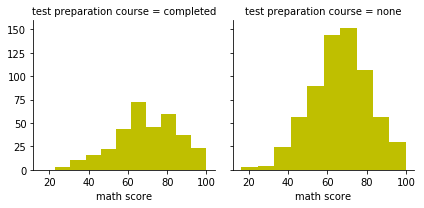

In [24]:
g = sns.FacetGrid(df, col='test preparation course')
g = g.map(plt.hist,"math score", color="y")
plt.show()

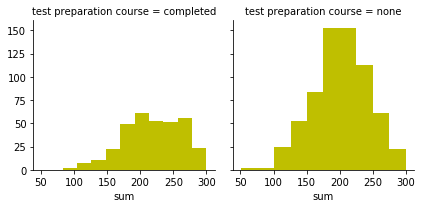

In [25]:
g = sns.FacetGrid(df, col='test preparation course')
g = g.map(plt.hist,"sum", color="y")
plt.show()

In [26]:
#Draw box plots for gender and race and analyze the findings

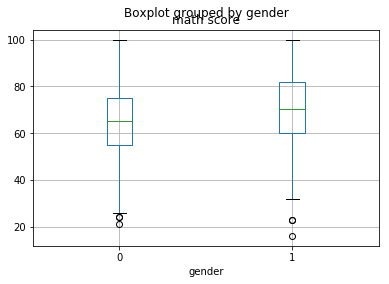

In [27]:
df.boxplot(column='math score' ,by='gender')

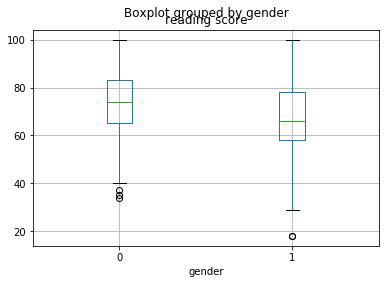

In [28]:
df.boxplot(column='reading score' ,by='gender')

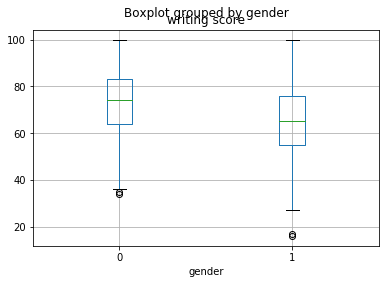

In [29]:
df.boxplot(column='writing score' ,by='gender')

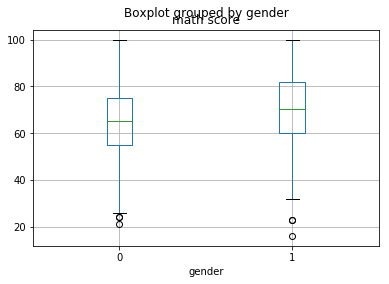

In [30]:
df.boxplot(column='math score' ,by='gender')

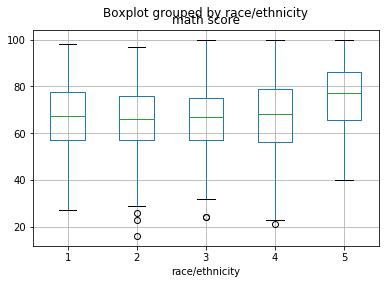

In [31]:
df.boxplot(column='math score' ,by='race/ethnicity')

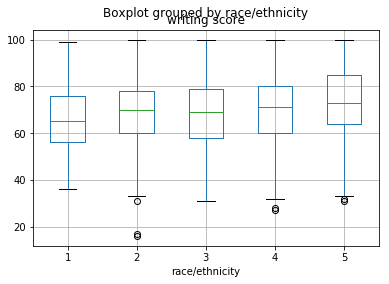

In [32]:
df.boxplot(column='writing score' ,by='race/ethnicity')

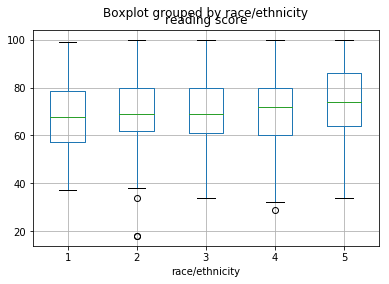

In [33]:
df.boxplot(column='reading score' ,by='race/ethnicity')

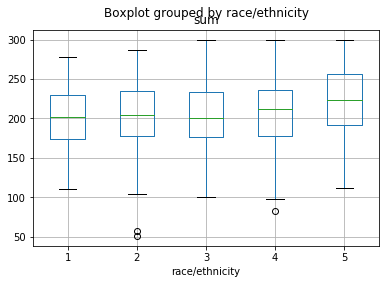

In [34]:
df.boxplot(column='sum' ,by='race/ethnicity')

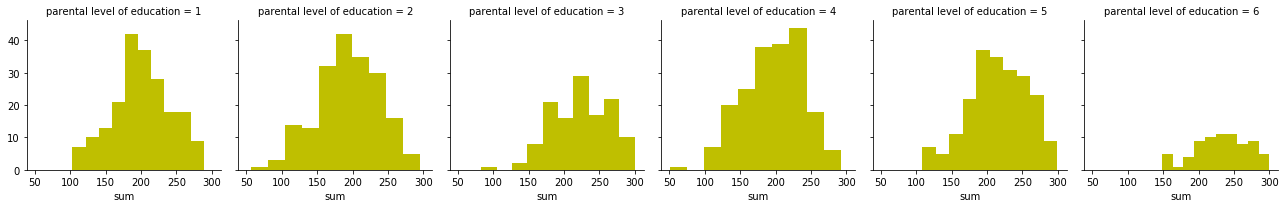

In [35]:
g = sns.FacetGrid(df, col='parental level of education')
g = g.map(plt.hist,"sum", color="y")
plt.show()

In [36]:
df['parental level of education'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)